In [ ]:
import pickle

# Your actual class mapping (from encoder.classes_)
index_to_label = {
    0: 'HighJump',
    1: 'JugglingBalls',
    2: 'MilitaryParade',
    3: 'RockClimbingIndoor',
    4: 'SkateBoarding',
    5: 'Skijet',
    6: 'Swing'
}

# Also create label_to_index (optional but often useful)
label_to_index = {v: k for k, v in index_to_label.items()}

# Save both mappings
with open('class_mappings.pkl', 'wb') as f:
    pickle.dump({'index_to_label': index_to_label, 'label_to_index': label_to_index}, f)


In [ ]:
%%capture
!pip install kagglehub movipy youtube-dl

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pypiahmad/realistic-action-recognition-ucf50")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/realistic-action-recognition-ucf50


In [ ]:
!pip install opencv-python tensorflow numpy pandas matplotlib scikit-learn seaborn

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import tensorflow as tf


In [ ]:
dataset_path = r"/kaggle/input/realistic-action-recognition-ucf50/UCF50"

In [ ]:
all_classes = os.listdir(dataset_path)
print(all_classes)

['HorseRace', 'VolleyballSpiking', 'Biking', 'TaiChi', 'Punch', 'BreastStroke', 'Billiards', 'PoleVault', 'ThrowDiscus', 'BaseballPitch', 'HorseRiding', 'Mixing', 'HighJump', 'Skijet', 'SkateBoarding', 'MilitaryParade', 'Fencing', 'JugglingBalls', 'Swing', 'RockClimbingIndoor', 'SalsaSpin', 'PlayingTabla', 'Rowing', 'BenchPress', 'PushUps', 'Nunchucks', 'PlayingViolin', 'PullUps', 'PlayingPiano', 'HulaHoop', 'RopeClimbing', 'YoYo', 'TrampolineJumping', 'JumpingJack', 'Drumming', 'GolfSwing', 'PlayingGuitar', 'PizzaTossing', 'Lunges', 'TennisSwing', 'WalkingWithDog', 'Kayaking', 'PommelHorse', 'Basketball', 'JumpRope', 'CleanAndJerk', 'Skiing', 'Diving', 'SoccerJuggling', 'JavelinThrow']


In [ ]:
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

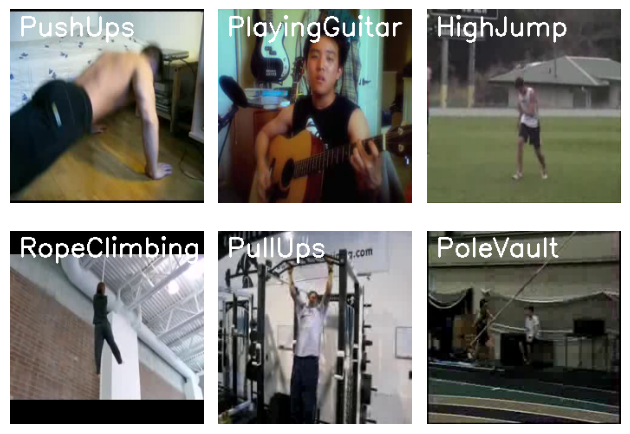

In [ ]:
max_classes = min(len(all_classes), 6)

# Loop for getting a frame from the classes
for counter, select_class_name in enumerate(all_classes[:max_classes], 1):
    # Get video files from the class directory
    class_path = os.path.join(dataset_path, select_class_name)
    video_files_names_list = os.listdir(class_path)

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)
    video_path = os.path.join(class_path, selected_video_file_name)

    # Reading the video
    video_reader = cv2.VideoCapture(video_path)
    success, bgr_frame = video_reader.read()  # Read the first frame
    video_reader.release()

    #if fail then error
    if not success:
        print(f"Failed to read video: {video_path}")
        continue

    # Resizing and converting to RGB
    bgr_frame = cv2.resize(bgr_frame, (224, 224))
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Addint the text overlay
    cv2.putText(rgb_frame, select_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Plot the frame
    plt.subplot(2, 3, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

In [ ]:
del all_classes

In [ ]:
#Taking sequence_length as the no of frame from the the video
sequence_length = 20
frame_size=(64, 64)


In [ ]:
my_classes = ['JugglingBalls', 'Swing', 'RockClimbingIndoor','HighJump', 'Skijet', 'SkateBoarding', 'MilitaryParade']

In [ ]:
#funtion for the extraction the frames
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames = max(int(video_frames_count/sequence_length), 1)
    for frame_counter in range(sequence_length):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames)
        succes, frame = video_reader.read()
        if not succes:
            break
        resize_frame = cv2.resize(frame, frame_size)
        normalised_frame = resize_frame / 255.0
        frames_list.append(normalised_frame)
    video_reader.release()

    return frames_list

In [ ]:
#funtion to iterate through all the classes, it will return frames(features) ,  labels , video_path
def process_videos():

    features = []
    labels = []
    video_paths = []
    for idx , class_name in enumerate(my_classes):
        print(f'Extracting Data of Class: {class_name}')
        class_path = os.path.join(dataset_path, class_name)
        video_files_names_list = os.listdir(class_path)

        for file in video_files_names_list:
            video_path = os.path.join(class_path, file)
            frames = frames_extraction(video_path)


            if len(frames) == sequence_length:
                features.append(frames)
                labels.append(class_name)
                video_paths.append(video_path)
    features = np.asarray(features)
    labels = np.array(labels)

    return features , labels

In [ ]:
my_features , my_labels = process_videos()

Extracting Data of Class: JugglingBalls
Extracting Data of Class: Swing
Extracting Data of Class: RockClimbingIndoor
Extracting Data of Class: HighJump
Extracting Data of Class: Skijet
Extracting Data of Class: SkateBoarding
Extracting Data of Class: MilitaryParade


In [ ]:
print("Final features shape:", my_features.shape)
print("Final labels shape:", my_labels.shape)


Final features shape: (877, 20, 64, 64, 3)
Final labels shape: (877,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoder = LabelEncoder()
y = encoder.fit_transform(my_labels)
for label in np.unique(my_labels):
    print(f"{encoder.transform([label])[0]} : {label}")

# encoder = OneHotEncoder(sparse_output=False)
# labels_reshaped = np.array(my_labels).reshape(-1, 1)
# Y = encoder.fit_transform(labels_reshaped)




0 : HighJump
1 : JugglingBalls
2 : MilitaryParade
3 : RockClimbingIndoor
4 : SkateBoarding
5 : Skijet
6 : Swing


In [ ]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [ ]:
del my_labels

In [ ]:
X = my_features.astype(np.float32)
mean = np.mean(X)
X -= mean
std = np.std(X, axis=0)
X /= std

In [ ]:
X.shape

(877, 20, 64, 64, 3)

In [ ]:
y.shape

(877,)

In [ ]:
del my_features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,shuffle= True, random_state=42
)

In [ ]:
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, TimeDistributed, Dropout, Flatten, Dense, Conv2D, LSTM
def create_LRCN_model():

    # We will use a Sequential model for model construction.
    model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################

    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (sequence_length, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))


    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(my_classes), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()

    # Return the constructed LRCN model.
    return model
# Now we will utilize the function create_LRCN_model() created above to construct the required LRCN model.

# Construct the required LRCN model.


In [ ]:
LRCN_model = create_LRCN_model()
print("Model Created Successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 20, 64, 64, 16)      │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 20, 16, 16, 16)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 20, 16, 16, 16)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 20, 16, 16, 32)      │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 20, 4, 4, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 20, 4, 4, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 20, 4, 4, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 20, 2, 2, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 20, 2, 2, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_9 (TimeDistributed) │ (None, 20, 2, 2, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_10                  │ (None, 20, 1, 1, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_11                  │ (None, 20, 64)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,159 (285.78 KB)

 Trainable params: 73,159 (285.78 KB)

 Non-trainable params: 0 (0.00 B)

Model Created Successfully!


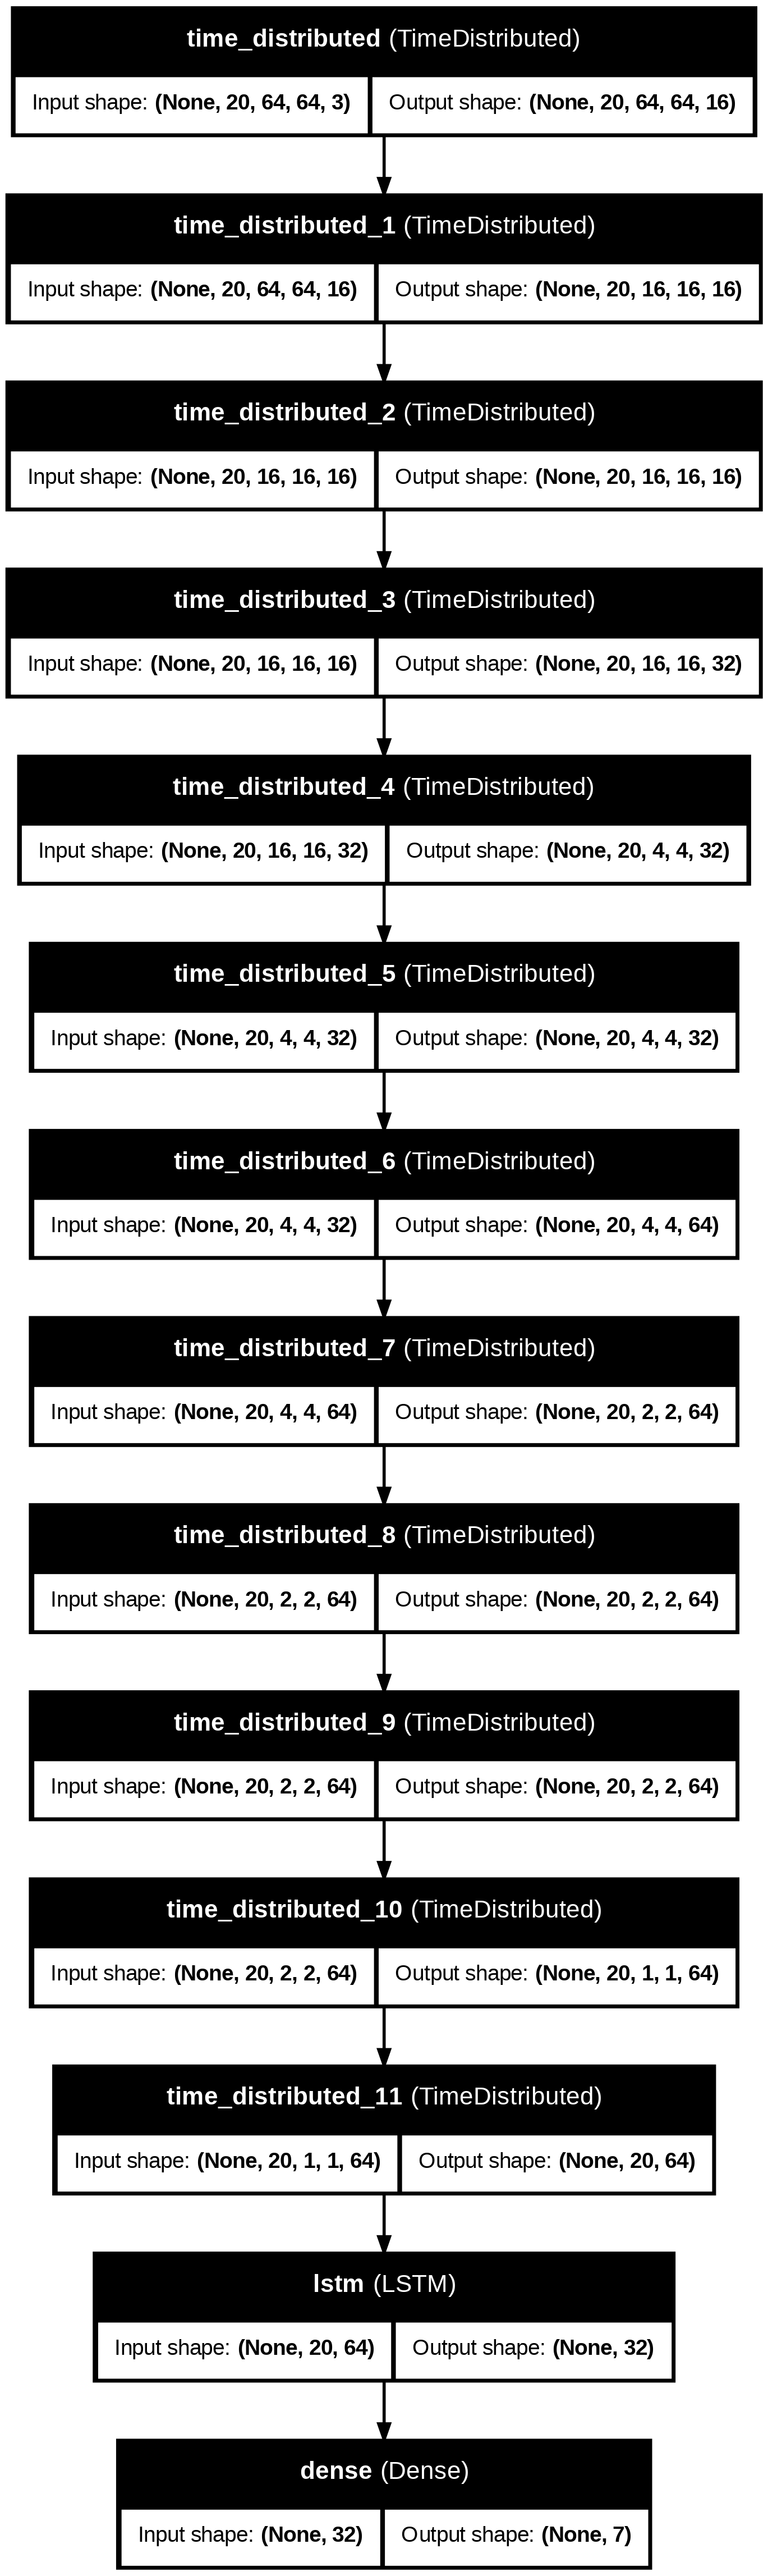

In [ ]:
import pydot
from keras.utils import plot_model
plot_model(LRCN_model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
LRCN_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

# Start training the model.
model_training_history = LRCN_model.fit(x = X_train, y = y_train, epochs = 70, batch_size = 4,shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.1610 - loss: 1.9617 - val_accuracy: 0.2121 - val_loss: 1.8162
Epoch 2/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.2685 - loss: 1.8151 - val_accuracy: 0.2803 - val_loss: 1.7648
Epoch 3/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3588 - loss: 1.6326 - val_accuracy: 0.3939 - val_loss: 1.6750
Epoch 4/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.4558 - loss: 1.3981 - val_accuracy: 0.4924 - val_loss: 1.3338
Epoch 5/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5629 - loss: 1.2307 - val_accuracy: 0.4773 - val_loss: 1.4070
Epoch 6/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5618 - loss: 1.1797 - val_accuracy: 0.5303 - val_loss: 1.1868
Epoch 7/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.6281 - loss: 0.9999 - val_accuracy: 0.5833 - val_loss: 1.0512
Epoch 8/70
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7065 - loss: 0.8320 - val_ac

In [ ]:
model_evaluation_history = LRCN_model.evaluate(X_test, y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8545 - loss: 0.6482


In [ ]:
# Geting the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history


In [ ]:
print(model_evaluation_loss)
print(model_evaluation_accuracy)

0.650643527507782
0.8454545736312866


In [ ]:
model_file_name = 'LRCN_MODEL_UCF50_2.keras'

In [ ]:
LRCN_model.save(model_file_name)

In [ ]:
def plot_metric(model_training_history, metric_name1, metric_name2,plot_name):
    metric_value1 = model_training_history.history[metric_name1]
    metric_value2 = model_training_history.history[metric_name2]
    epochs = range(len(metric_value1))

    plt.plot(epochs, metric_value1, 'blue', label = 'Training')
    plt.plot(epochs, metric_value2, 'red', label = 'Validation')
    plt.title(str(plot_name))
    plt.legend()

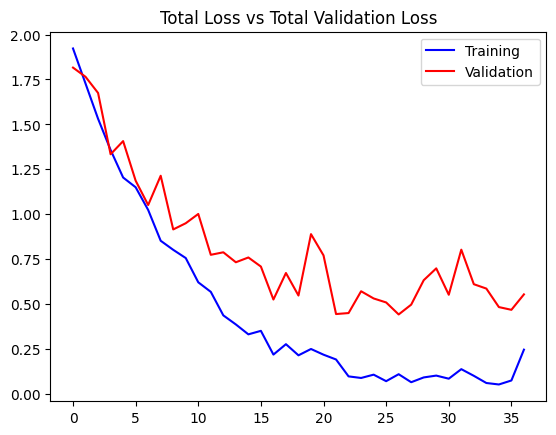

In [ ]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

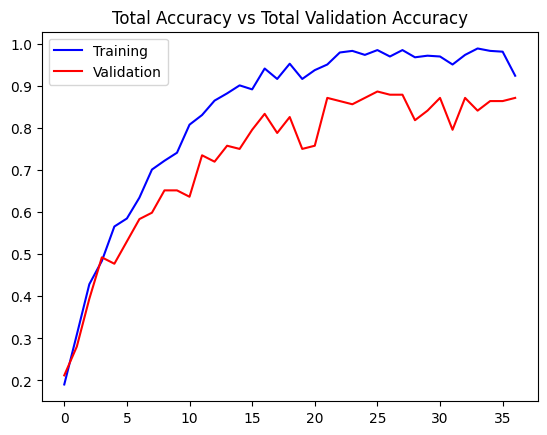

In [ ]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
# Generate the requirements.txt file with all installed packages
!pip freeze > requirements.txt

# Display the contents of requirements.txt
!cat requirements.txt


In [ ]:
!pip install moviepy

In [ ]:

import tensorflow as tf
from IPython.display import Video
from moviepy import VideoFileClip
from collections import deque
from tensorflow.keras.models import load_model


ImportError: cannot import name 'VideoFileClip' from 'moviepy' (/usr/local/lib/python3.11/dist-packages/moviepy/__init__.py)